In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/si-wei-chen/frcnn.git

Cloning into 'simple-faster-rcnn-pytorch'...
remote: Enumerating objects: 546, done.
remote: Total 546 (delta 0), reused 0 (delta 0), pack-reused 546
Receiving objects: 100% (546/546), 2.14 MiB | 3.08 MiB/s, done.
Resolving deltas: 100% (363/363), done.


In [3]:
!pip install scikit-image tqdm fire ipdb matplotlib torchnet

     |████████████████████████████████| 87 kB 7.1 MB/s 
     |████████████████████████████████| 793 kB 69.6 MB/s 
     |████████████████████████████████| 381 kB 70.8 MB/s 
     |████████████████████████████████| 676 kB 65.5 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=8463b4fd2a0ae806549614ac49f5041018eb4a35d88c096ef8392c89abe2426e
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for ipdb: filename=ipdb-0.13.9-py3-none-any.whl size=11648 sha256=d41f41223862eabaed18c4c7da88a3e65dbeff47636de990926c1972202aa59e
  Stored in directory: /root/.cache/pip/wheels/65/cd/cc/aaf92acae337a28fdd2aa4d632196a59745c8c39f76eaeed01
  Created wheel for torchnet: filename=torchnet-0.0.4-py3-none-any.whl size=29742 sha256=38b0a7d317035d90424d5301c43268387cfb956510878fe934ba24efe660bc18
  Stored in directory: /root/.cache/pip/wheels/9

In [13]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from frcnn.utils.config import opt
from frcnn.model.faster_rcnn_vgg16 import FasterRCNNVGG16
from frcnn.trainer import FasterRCNNTrainer
from frcnn.data.util import  read_image
from frcnn.utils.vis_tool import vis_bbox
from frcnn.utils import array_tool as at
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
img = read_image('frcnn/misc/demo.jpg')
img = t.from_numpy(img)[None]

In [16]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Setting up a new session...
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/usr/lib/python3.7/http/client.py", line 1281, in request
    self._send_request(method, url, body

Exception in user code:
------------------------------------------------------------


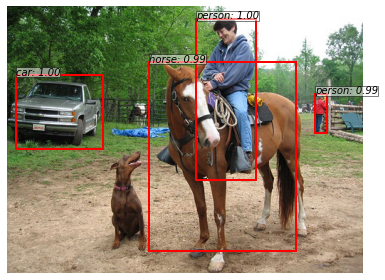

In [24]:
trainer.load('/content/drive/MyDrive/fasterrcnn_12211511_0.701052458187_torchvision_pretrain.pth')
opt.caffe_pretrain=False # this model was trained from torchvision-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it